# 3. Розв'язування нелінійних рівнянь
------------

Нехай маємо рівняння

$(1)\qquad\qquad\qquad
f(x)=0, \quad x\in [a,b],$

де $f:[a,b]\to \mathbb{R}$ -- неперервна на $[a,b]$ функція.


### 3.1.5. Метод січних
--------------
Нехай рівняння (1) 
має і тільки один корінь $x_*$ на відрізку $[a,b]$. 

Запишемо це рівняння у вигляді

$(2)\qquad\qquad\qquad
x = \varphi (x),$
 
де 

$(3)\qquad\qquad\qquad \varphi(x) := x + \rho(x)f(x),\quad x\in [a,b],$

а $\rho:[a,b]\to \mathbb{R}$ -- довільна неперервна функція, яка не має коренів на $[a,b]$. Зокрема, може бути $\rho(x)= 1,\, x\in [a,b]$.

Метод простої ітерації визначається так:

* задаємо початкове значення $x_0\in [a,b]$ і

* знаходимо послідовні наближення $x_1, x_2, x_3, \ldots$ розв'язку рівняння (2) за формулою

$(4)\qquad\qquad\qquad x_{n+1} = \varphi(x_n), \quad n=0,1,2, \dots\,.$


**Теорема.** Нехай функція $\varphi: [a,b]\to \mathbb{R}$ є стискуючим відображенням, тобто задовольняє умову Ліпшиця 

$(5)\qquad\qquad\qquad 
|\varphi(x^{\prime\prime}) - \varphi(x^{\prime})| \leqslant q|x^{\prime\prime} - x^{\prime}|,\quad x^{\prime}, \ x^{\prime\prime} \in [a,b],$

зі сталою $q\in (0,1)$,
та $x_0$ і $d>0$ такі, що $ [x_0-d,x_0+d]\subset [a,b]$ і 

$(6)\qquad\qquad\qquad
|\varphi(x_0)-x_0| \leqslant (1-q)d$.

Тоді рівняння (2) має на відрізку $[x_0-d,x_0+d]$ єдиний корінь $x_*$ і він є границею послідовності (4).

Для похибки  $x_{n+1} - x_*$ маємо оцінку

$(7)\qquad\qquad\qquad
|x_{n+1} - x_*|\leqslant q^{n+1} |b-a|.$
 
тобто метод простої ітерації збігається зі швидкістю геометричної прогресії із знаменником $q$.


#### Пояснення до використання програмного коду
-----------------
*   Підготувати середовище і потрібні функції : 
    1. виконати комірку для підготовки середовища
    2. виконати комірку, де **визначена** функція ``secant_iteration`` 
    3. виконати комірку, де **визначена** функція ``plot_graphics``
    4. виконати комірку, де **визначена** функція ``f`` 
    
*   Локалізувати (графічно) корінь рівняння (1)
    1. виконати комірку, в якій задається відрізок
    2. виконати комірку, в якій будується графік
    3. виконати комірку, в якій задається звужений відрізок
    4. виконати комірку, в якій будується графік на звуженому відрізку
    5. пункти 3 і 4 можна повтороти для точнішої локалізації потрібного кореня
    
*   Обчислити наближення локалізованого кореня
    1. задати точність ``eps`` наближеного кореня та початкові наближення ``x0`` і ``x1``
    2. виконати комірку, де є **виклик** функції ``secant_iteration``
    3. для знаходження іншого корення виконати дії пунктів локалізації

In [1]:
# Підготовка середовища

# при виконанні в JupyterLab наступний рядок розкоментувати
#%matplotlib widget

import numpy as np
import matplotlib.pyplot as plt

>#### ``secant_iteration`` -- фуункція, яка реалізує метод січних 

In [2]:
def secant_iteration(f,a, b, x0,x1, eps):
    """ знаходження методом січних наближеного кореня рівняння (1), 
        де f -- непервна функція на відрізку [a, b],          
        x0 -- початкове наближення
        eps -- задана точність
    """   
    x_pprev=x0
    x_prev=x1
    k=2
    x_new = x_prev - f(x_prev)*(x_prev-x_pprev)/(f(x_prev)-f(x_pprev))
    if np.abs(x_new-x_prev)<eps:
        return x_new,k
    while np.abs(x_new-x_prev) > eps:
        k+=1
        x_pprev=x_prev
        x_prev = x_new
        x_new = x_prev - f(x_prev)*(x_prev-x_pprev)/(f(x_prev)-f(x_pprev))       
    return x_new,k

>#### ``Newton_iteration`` -- фуункція, яка реалізує метод Ньютона 

In [3]:
def Newton_iteration(f,f_deriv, a, b, x0, eps):
    """ знаходження методом Ньютона наближеного кореня рівняння (1), 
        де f -- непервна функція на відрізку [a, b],  
        f_deriv -- похідна функція на відрізку [a, b]
        x0 -- початкове наближення
        eps -- задана точність
    """   
    x_prev=x0
    k=1
    x_new = x_prev - f(x_prev)/f_deriv(x_prev)
    if np.abs(x_new-x_prev)<eps:
        return x_new,k
    while np.abs(x_new-x_prev) > eps:
        k+=1
        x_prev = x_new
        x_new = x_prev - f(x_prev)/f_deriv(x_prev)       
    return x_new,k

>#### ``simple_iteration`` -- фуункція, яка реалізує метод простої ітерації 

In [4]:
def simple_iteration(f,rho,a,b, x0, eps):
    """ знаходження методом простої ітерації наближеного кореня рівняння (1), 
        де f -- непервна стискаюча функція на відрізку [a, b],  
        rho -- непервна функція на відрізку [a, b]
        x0 -- початкове наближення
        eps -- задана точність
    """  
    x_prev=x0
    k=1
    x_new = x_prev + rho(x_prev)*f(x_prev)
    if np.abs(x_new-x_prev)<eps:
        return x_new,k
    while np.abs(x_new-x_prev) > eps:
        k+=1
        x_prev = x_new
        x_new = x_prev + rho(x_prev)*f(x_prev)       
    return x_new,k

>#### ``bisection`` -- фуункція, яка реалізує метод бісекції 

In [5]:
def bisection(f,a,b,eps):
    """ знаходження методом бісекції наближеного кореня рівняння (1), 
        де f -- непервна функція на проміжку (a, b), eps -- задана точність
    """
    ba=np.abs(b-a)
    k=1
    if ba < eps:
        return (a+b)/2
    while ba > eps:
        k+=1
        fa=f(a)
        x=(a+b)/2
        fx=f(x)
        if fx==0 :
            return x, k
        if fa*fx < 0:
            b=x
        else:
            a=x
        ba=np.abs(b-a)
    return (a+b)/2,k

>#### ``plot_graphics`` -- фуункція для побудови графіка функції ``f`` на відрізку ``[a,\,b]`` за значеннями в ``n`` точках 

In [6]:
def plot_graphics(f, a, b, n):
    """фуункція для побудови графіка функції f 
       на відрізку [a,b] за значеннями в n точках 
    """
    xarr = np.linspace(a, b, n)    
    y=f(xarr) 
    fig = plt.figure()
    ax = fig.gca()
    ax.plot(xarr,y)
    ax.axhline(color="grey", ls="--", zorder=-1)
    ax.axvline(color="grey", ls="--", zorder=-1)
    ax.set_xlim(a,b)
    plt.show()

In [7]:
def f(x):
    """функція лівої частини рівняння (1)"""
    return np.sin(x*x-2*x)

In [8]:
def f_deriv(x):
    """похідна функції лівої частини рівняння (1)"""
    return (2*x - 2)*np.cos(x*x-2*x)

In [9]:
def rho(x):
    """функція \rho в рівнянні (2)"""
    return 1

>#### Побудова графіку функції ``f``

In [10]:
# задання відрізка
a=-10
b=10

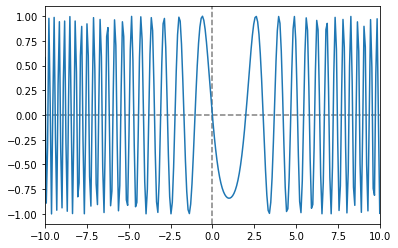

In [11]:
plot_graphics(f, a, b, 256)

In [12]:
plt.close('all')

>#### Уточнення проміжку ``[a, b]``

In [13]:
# задання відрізка
a=2.9
b=3.1

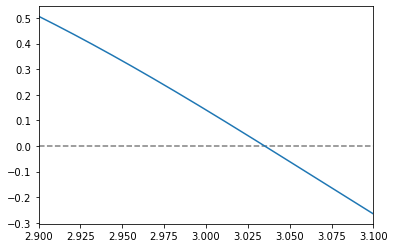

In [14]:
plot_graphics(f, a, b, 256)

In [15]:
plt.close('all')

In [16]:
#знаходження наближення кореня
eps=0.00001
x0=a
x1=b
x, k =secant_iteration(f, a, b,x0, x1, eps)
print(f"корінь рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

корінь рівняння x=3.0350903305724577 з точністю eps=1e-05 за k=5 ітерацій


In [17]:
#знаходження наближення кореня
eps=0.00001
x0=3
x, k =Newton_iteration(f, f_deriv, a, b,x0, eps)
print(f"корінь рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

корінь рівняння x=3.0350903305725274 з точністю eps=1e-05 за k=3 ітерацій


In [18]:
#знаходження наближення кореня
eps=0.00001
x0=3
x, k =simple_iteration(f, rho, a, b,x0, eps)
print(f"корінь рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

корінь рівняння x=3.035089257932675 з точністю eps=1e-05 за k=62072 ітерацій


In [19]:
#знаходження наближення кореня
eps=0.00001
x, k =bisection(f, a, b, eps)
print(f"корінь рівняння x={x} з точністю eps={eps} за k={k} ітерацій")

корінь рівняння x=3.0350921630859373 з точністю eps=1e-05 за k=16 ітерацій
